In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Settings to improve readability
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:

df = pd.read_excel('capstone data for coding.xlsx')

# Preview the dataset
df.head()

,Random Student ID,Site,gender,race,el,sped,@gt,Reading_Scale_Score,Reading_Performance_Level,Math_Scale_Score,Math_Performance_Level,CogAt_NONVERBAL_SAS,CogAt_VERBAL_SAS,CogAt_QUANTITATIVE_SAS,DESSA_ScaleScore,DESSA_PerformanceLevel
0,736251.0,AR,0.0,4.0,1.0,1.0,0.0,525.0,3.0,518.0,2.0,107.0,94.0,95.0,49.0,Typical
1,194878.0,AR,0.0,1.0,0.0,1.0,0.0,503.0,2.0,510.0,2.0,100.0,83.0,104.0,36.0,Need
2,842071.0,AR,0.0,1.0,0.0,0.0,0.0,521.0,3.0,556.0,4.0,98.0,97.0,104.0,49.0,Typical
3,856404.0,AR,1.0,4.0,1.0,0.0,0.0,508.0,2.0,507.0,2.0,94.0,94.0,100.0,49.0,Typical
4,173354.0,AR,1.0,4.0,0.0,0.0,0.0,494.0,1.0,517.0,2.0,87.0,78.0,85.0,49.0,Typical


In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate unique random IDs for each student
df['Anon_ID'] = np.random.permutation(range(100000, 100000 + len(df)))

# Drop the original ID column (update 'Random Student ID' with the actual name)
df = df.drop(columns=['Random Student ID'])

# Preview the result
df.head()


,Site,gender,race,el,sped,@gt,Reading_Scale_Score,Reading_Performance_Level,Math_Scale_Score,Math_Performance_Level,CogAt_NONVERBAL_SAS,CogAt_VERBAL_SAS,CogAt_QUANTITATIVE_SAS,DESSA_ScaleScore,DESSA_PerformanceLevel,Anon_ID
0,AR,0.0,4.0,1.0,1.0,0.0,525.0,3.0,518.0,2.0,107.0,94.0,95.0,49.0,Typical,100443
1,AR,0.0,1.0,0.0,1.0,0.0,503.0,2.0,510.0,2.0,100.0,83.0,104.0,36.0,Need,102075
2,AR,0.0,1.0,0.0,0.0,0.0,521.0,3.0,556.0,4.0,98.0,97.0,104.0,49.0,Typical,101366
3,AR,1.0,4.0,1.0,0.0,0.0,508.0,2.0,507.0,2.0,94.0,94.0,100.0,49.0,Typical,100259
4,AR,1.0,4.0,0.0,0.0,0.0,494.0,1.0,517.0,2.0,87.0,78.0,85.0,49.0,Typical,102164


In [4]:
# Get basic info
df.info()

# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site                       2436 non-null   object 
 1   gender                     2436 non-null   float64
 2   race                       2436 non-null   float64
 3   el                         2437 non-null   float64
 4   sped                       2436 non-null   float64
 5   @gt                        2436 non-null   float64
 6   Reading_Scale_Score        2436 non-null   float64
 7   Reading_Performance_Level  2436 non-null   float64
 8   Math_Scale_Score           2433 non-null   float64
 9   Math_Performance_Level     2433 non-null   float64
 10  CogAt_NONVERBAL_SAS        2436 non-null   float64
 11  CogAt_VERBAL_SAS           2397 non-null   float64
 12  CogAt_QUANTITATIVE_SAS     2381 non-null   float64
 13  DESSA_ScaleScore           2436 non-null   float

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Summary statistics for numeric columns
df.describe()


Number of duplicate rows: 0


,gender,race,el,sped,@gt,Reading_Scale_Score,Reading_Performance_Level,Math_Scale_Score,Math_Performance_Level,CogAt_NONVERBAL_SAS,CogAt_VERBAL_SAS,CogAt_QUANTITATIVE_SAS,DESSA_ScaleScore,Anon_ID
count,2436.000000,2436.000000,2437.000000,2436.0000,2436.0,2436.000000,2436.000000,2433.000000,2433.000000,2436.000000,2397.000000,2381.000000,2436.000000,2438.000000
mean,0.503284,2.239327,0.440706,0.1367,0.0,515.349343,2.590722,521.995068,2.429511,102.041872,98.123488,103.557329,56.140394,101218.500000
std,0.500092,1.396310,10.881370,0.3436,0.0,17.523205,1.078243,22.017225,1.007815,16.007849,15.762658,16.387860,10.640591,703.934301
min,0.000000,1.000000,0.000000,0.0000,0.0,400.000000,1.000000,400.000000,1.000000,51.000000,52.000000,58.000000,28.000000,100000.000000
25%,0.000000,1.000000,0.000000,0.0000,0.0,503.000000,2.000000,505.000000,2.000000,91.000000,87.000000,92.000000,48.000000,100609.250000
50%,1.000000,2.000000,0.000000,0.0000,0.0,515.000000,3.000000,519.000000,2.000000,102.000000,97.000000,102.000000,53.000000,101218.500000
75%,1.000000,4.000000,0.000000,0.0000,0.0,528.000000,4.000000,534.000000,3.000000,112.000000,109.000000,114.000000,67.000000,101827.750000
max,1.000000,7.000000,537.000000,1.0000,0.0,573.000000,4.000000,600.000000,4.000000,160.000000,160.000000,159.000000,71.000000,102437.000000


In [6]:
# Drop rows with any missing values
df_clean = df.dropna()

# Check how many rows were dropped
print("Original number of rows:", df.shape[0])
print("Number of rows after dropping missing values:", df_clean.shape[0])
print("Number of rows dropped:", df.shape[0] - df_clean.shape[0])


Original number of rows: 2438
Number of rows after dropping missing values: 2348
Number of rows dropped: 90


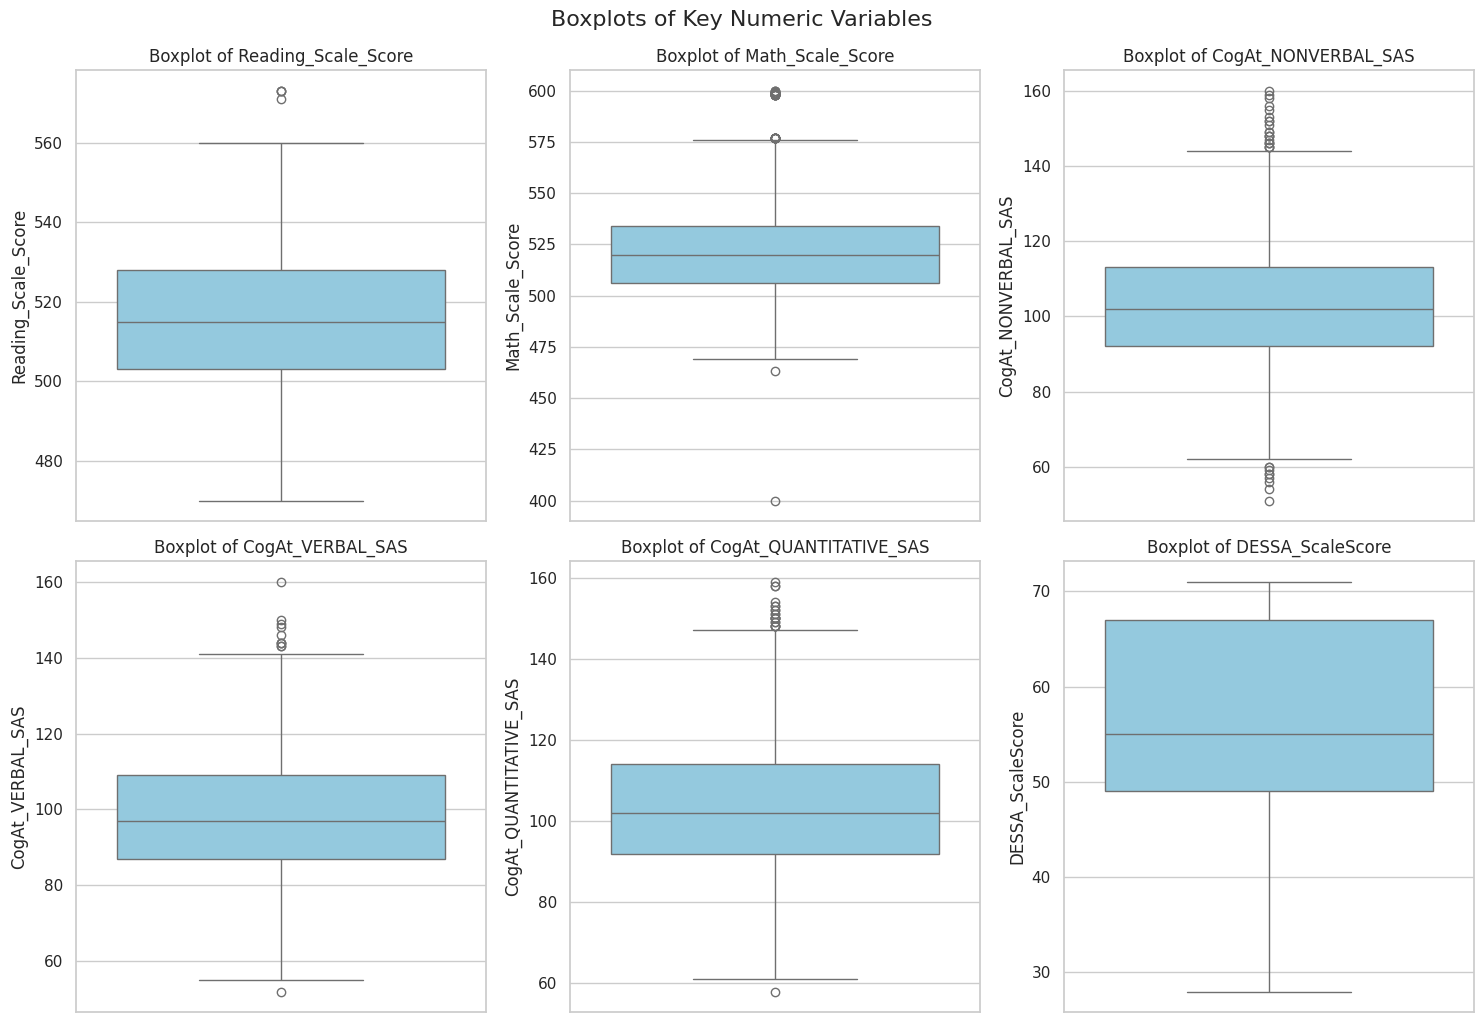

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns to visualize
numeric_cols = [
    'Reading_Scale_Score',
    'Math_Scale_Score',
    'CogAt_NONVERBAL_SAS',
    'CogAt_VERBAL_SAS',
    'CogAt_QUANTITATIVE_SAS',
    'DESSA_ScaleScore'
]

# Set the visual style
sns.set(style="whitegrid")

# Create boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_clean, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Boxplots of Key Numeric Variables', fontsize=16, y=1.02)
plt.show()


In [8]:
# Define numeric columns to check
numeric_cols = [
    'Reading_Scale_Score',
    'Math_Scale_Score',
    'CogAt_NONVERBAL_SAS',
    'CogAt_VERBAL_SAS',
    'CogAt_QUANTITATIVE_SAS',
    'DESSA_ScaleScore'
]

# Function to get outlier rows based on IQR
def get_outlier_rows(df, columns):
    outlier_rows = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows outside bounds
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outliers = outliers.copy()
            outliers['Outlier_Column'] = col
            outlier_rows = pd.concat([outlier_rows, outliers])

    return outlier_rows.drop_duplicates()

# Get outliers
outlier_data = get_outlier_rows(df_clean, numeric_cols)

# Show the first few outlier rows for inspection
outlier_data[['Anon_ID', 'Outlier_Column'] + numeric_cols].head(10)


,Anon_ID,Outlier_Column,Reading_Scale_Score,Math_Scale_Score,CogAt_NONVERBAL_SAS,CogAt_VERBAL_SAS,CogAt_QUANTITATIVE_SAS,DESSA_ScaleScore
89,101073,Reading_Scale_Score,571.0,565.0,133.0,125.0,149.0,71.0
1618,101543,Reading_Scale_Score,573.0,517.0,109.0,118.0,97.0,61.0
1888,100945,Reading_Scale_Score,573.0,600.0,132.0,135.0,148.0,61.0
2005,102385,Reading_Scale_Score,573.0,599.0,143.0,139.0,142.0,71.0
42,100670,Math_Scale_Score,536.0,577.0,131.0,119.0,131.0,71.0
101,101731,Math_Scale_Score,525.0,599.0,146.0,122.0,158.0,49.0
130,101221,Math_Scale_Score,560.0,599.0,139.0,129.0,132.0,53.0
174,102090,Math_Scale_Score,552.0,577.0,136.0,122.0,119.0,71.0
208,101420,Math_Scale_Score,543.0,599.0,137.0,119.0,147.0,67.0
217,100993,Math_Scale_Score,539.0,599.0,133.0,102.0,147.0,53.0


In [10]:
# One-hot encode the 'race' column and drop the first category to avoid multicollinearity
race_dummies = pd.get_dummies(df_clean['race '], prefix='race ', drop_first=True)

# Drop the original 'race' column from the DataFrame
df_clean = df_clean.drop(columns='race ')

# Concatenate the dummy variables to the original DataFrame
df_clean = pd.concat([df_clean, race_dummies], axis=1)

# Preview the updated DataFrame
df_clean.head()


,Site,gender,el,sped,@gt,Reading_Scale_Score,Reading_Performance_Level,Math_Scale_Score,Math_Performance_Level,CogAt_NONVERBAL_SAS,CogAt_VERBAL_SAS,CogAt_QUANTITATIVE_SAS,DESSA_ScaleScore,DESSA_PerformanceLevel,Anon_ID,race _2.0,race _3.0,race _4.0,race _5.0,race _6.0,race _7.0
0,AR,0.0,1.0,1.0,0.0,525.0,3.0,518.0,2.0,107.0,94.0,95.0,49.0,Typical,100443,False,False,True,False,False,False
1,AR,0.0,0.0,1.0,0.0,503.0,2.0,510.0,2.0,100.0,83.0,104.0,36.0,Need,102075,False,False,False,False,False,False
2,AR,0.0,0.0,0.0,0.0,521.0,3.0,556.0,4.0,98.0,97.0,104.0,49.0,Typical,101366,False,False,False,False,False,False
3,AR,1.0,1.0,0.0,0.0,508.0,2.0,507.0,2.0,94.0,94.0,100.0,49.0,Typical,100259,False,False,True,False,False,False
4,AR,1.0,0.0,0.0,0.0,494.0,1.0,517.0,2.0,87.0,78.0,85.0,49.0,Typical,102164,False,False,True,False,False,False


In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


In [12]:
# Define feature columns
feature_cols = [
    'gender', 'el', 'sped', '@gt',
    'DESSA_ScaleScore', 'CogAt_NONVERBAL_SAS',
    'CogAt_VERBAL_SAS', 'CogAt_QUANTITATIVE_SAS',
    'race _2.0', 'race _3.0', 'race _4.0', 'race _5.0', 'race _6.0', 'race _7.0'
]

# Define targets
target_reading = 'Reading_Scale_Score'
target_math = 'Math_Scale_Score'


In [13]:
# Split into training and testing sets (80/20)
X = df_clean[feature_cols]
y_reading = df_clean[target_reading]
y_math = df_clean[target_math]

X_train, X_test, y_reading_train, y_reading_test = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_math_train, y_math_test = train_test_split(X, y_math, test_size=0.2, random_state=42)


In [14]:
# Standardize features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Initialize models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# Fit models
lr.fit(X_train_scaled, y_reading_train)
lasso.fit(X_train_scaled, y_reading_train)
ridge.fit(X_train_scaled, y_reading_train)

# Predict
lr_preds = lr.predict(X_test_scaled)
lasso_preds = lasso.predict(X_test_scaled)
ridge_preds = ridge.predict(X_test_scaled)

# Evaluate
def print_metrics(y_true, preds, model_name):
    print(f"\n{model_name} Performance on Reading:")
    print("MAE:", mean_absolute_error(y_true, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, preds)))
    print("R² Score:", r2_score(y_true, preds))

print_metrics(y_reading_test, lr_preds, "Linear Regression")
print_metrics(y_reading_test, lasso_preds, "LASSO Regression")
print_metrics(y_reading_test, ridge_preds, "Ridge Regression")



Linear Regression Performance on Reading:
MAE: 8.823981837622863
RMSE: 11.087246915597879
R² Score: 0.5865724397219501

LASSO Regression Performance on Reading:
MAE: 8.806485130705168
RMSE: 11.076448728306026
R² Score: 0.5873773454523132

Ridge Regression Performance on Reading:
MAE: 8.823670412203056
RMSE: 11.086830298711552
R² Score: 0.5866035092323731


In [20]:

# Define predictors and target for Math
feature_cols = [
    'gender', 'el', 'sped', '@gt',
    'DESSA_ScaleScore', 'CogAt_NONVERBAL_SAS',
    'CogAt_VERBAL_SAS', 'CogAt_QUANTITATIVE_SAS',
    'race _2.0', 'race _3.0', 'race _4.0', 'race _5.0', 'race _6.0', 'race _7.0'
]

X = df_clean[feature_cols]
y_math = df_clean['Math_Scale_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_math, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# Fit models
lr.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Make predictions
lr_math_preds = lr.predict(X_test_scaled)
lasso_math_preds = lasso.predict(X_test_scaled)
ridge_math_preds = ridge.predict(X_test_scaled)

# Define a function to evaluate models
def print_metrics(y_true, preds, model_name):
    print(f"\n{model_name} Performance on Math:")
    print("MAE:", mean_absolute_error(y_true, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, preds)))
    print("R² Score:", r2_score(y_true, preds))

# Evaluate models
print_metrics(y_test, lr_math_preds, "Linear Regression")
print_metrics(y_test, lasso_math_preds, "LASSO Regression")
print_metrics(y_test, ridge_math_preds, "Ridge Regression")



Linear Regression Performance on Math:
MAE: 9.41284776313851
RMSE: 12.521028045666824
R² Score: 0.6533626103386724

LASSO Regression Performance on Math:
MAE: 9.382279976730063
RMSE: 12.481007579333438
R² Score: 0.6555749557989958

Ridge Regression Performance on Math:
MAE: 9.412194536435159
RMSE: 12.520797889543562
R² Score: 0.6533753536987612


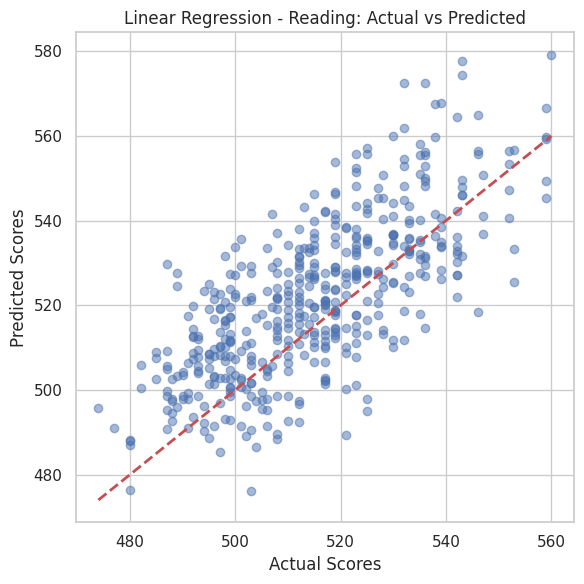

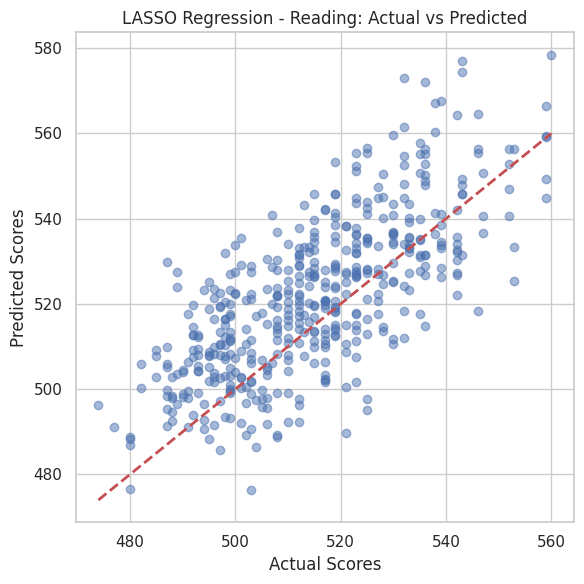

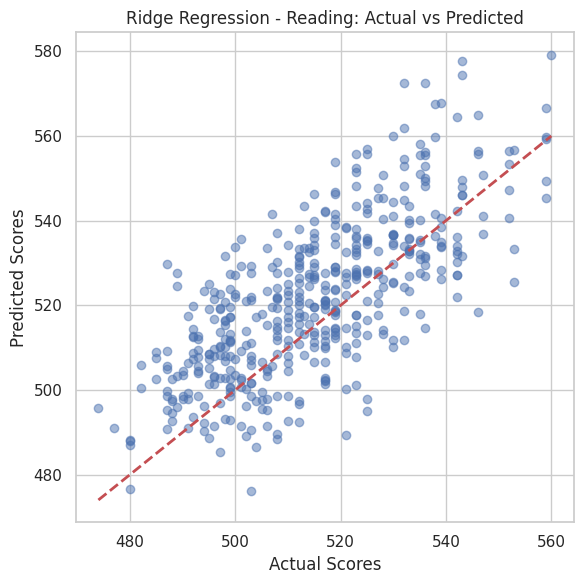

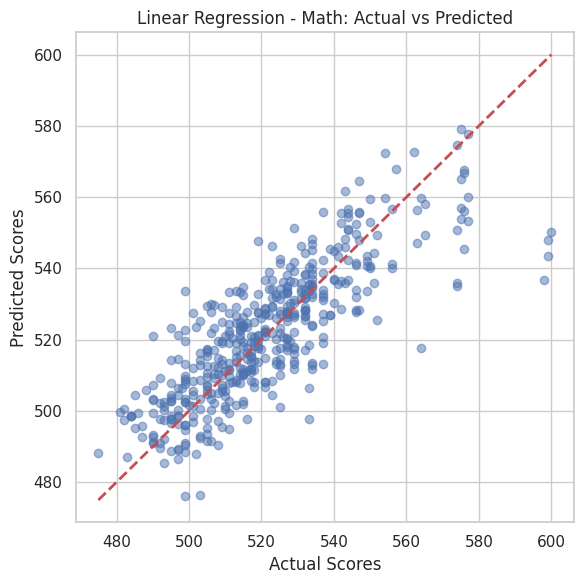

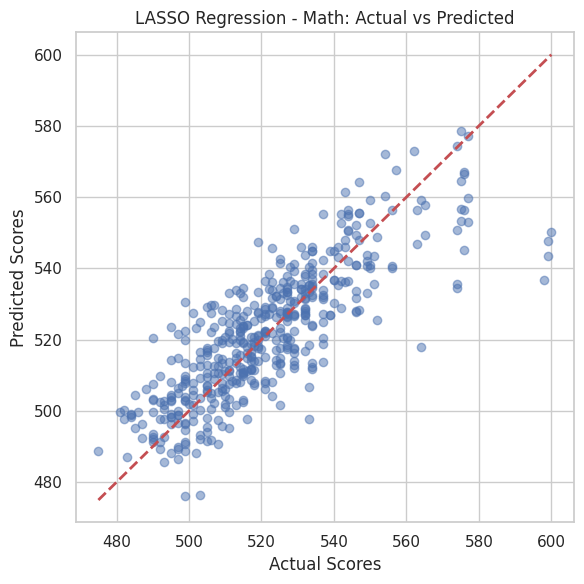

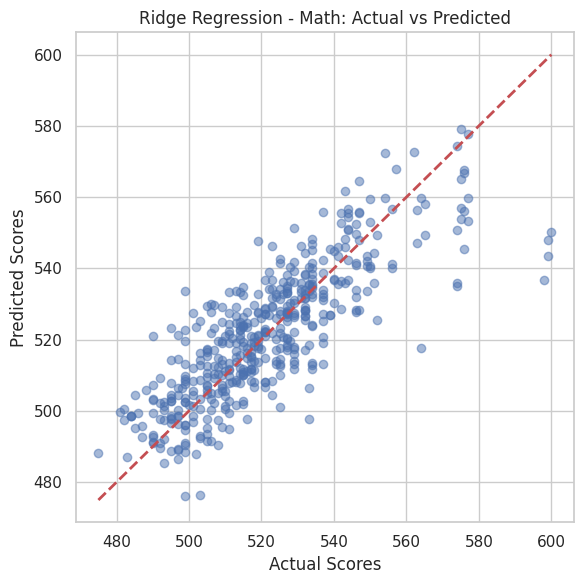

In [21]:
import matplotlib.pyplot as plt

# Define a helper function to plot actual vs predicted values
def plot_predictions(y_true, y_preds, model_name, subject):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_preds, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(f'{model_name} - {subject}: Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Reading Predictions
plot_predictions(y_reading_test, lr_preds, "Linear Regression", "Reading")
plot_predictions(y_reading_test, lasso_preds, "LASSO Regression", "Reading")
plot_predictions(y_reading_test, ridge_preds, "Ridge Regression", "Reading")

# Math Predictions
plot_predictions(y_math_test, lr_math_preds, "Linear Regression", "Math")
plot_predictions(y_math_test, lasso_math_preds, "LASSO Regression", "Math")
plot_predictions(y_math_test, ridge_math_preds, "Ridge Regression", "Math")


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_reading = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reading.fit(X_train, y_reading_train)

# Predict on test data
rf_reading_preds = rf_reading.predict(X_test)

# Evaluate performance
def print_metrics(y_true, preds, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, preds)))
    print("R² Score:", r2_score(y_true, preds))

print_metrics(y_reading_test, rf_reading_preds, "Random Forest (Reading)")



Random Forest (Reading) Performance:
MAE: 9.086021276595746
RMSE: 11.452605454748175
R² Score: 0.558876103994481


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model for Math
rf_math = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_math.fit(X_train, y_math_train)

# Predict on the test set
rf_math_preds = rf_math.predict(X_test)

# Evaluate the model
print_metrics(y_math_test, rf_math_preds, "Random Forest (Math)")



Random Forest (Math) Performance:
MAE: 9.580936170212766
RMSE: 12.67545512213236
R² Score: 0.6447594343616411


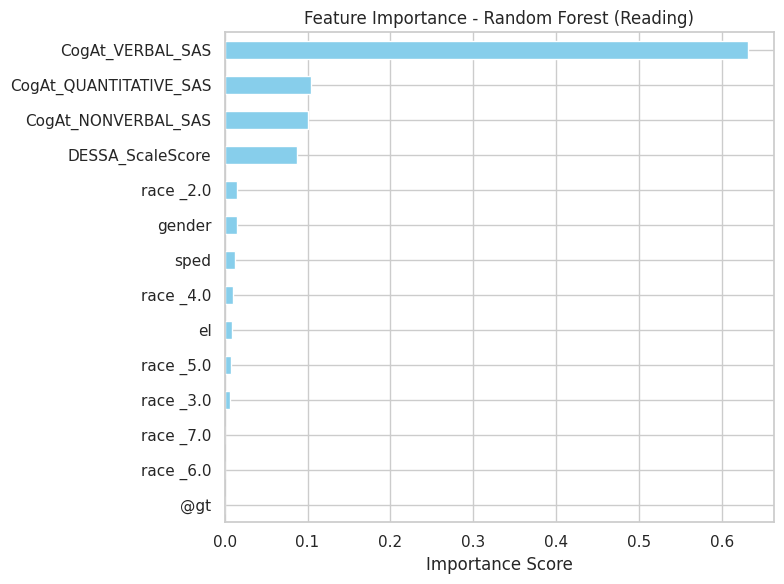

In [27]:
# Get feature importances from the fitted Random Forest reading model
rf_reading_importance = pd.Series(
    rf_reading.feature_importances_,
    index=X_train.columns
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
rf_reading_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance - Random Forest (Reading)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


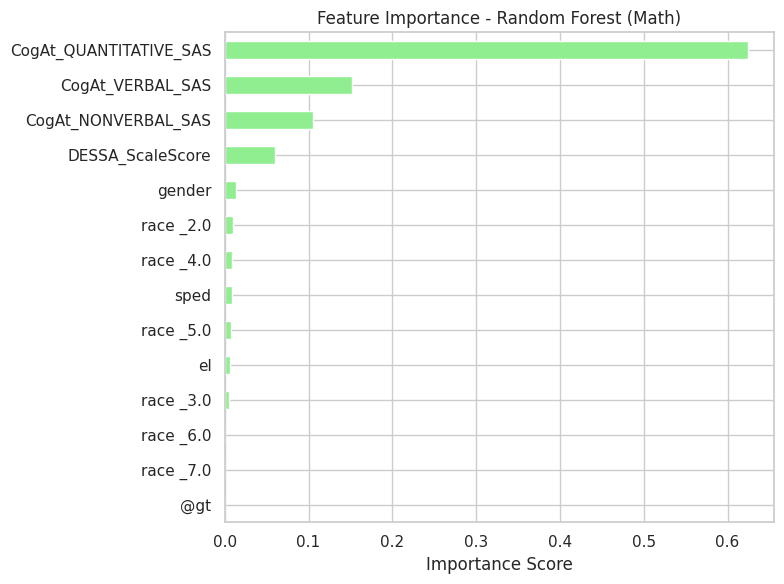

In [28]:
# Get feature importances from the fitted Random Forest math model
rf_math_importance = pd.Series(
    rf_math.feature_importances_,
    index=X_train.columns
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
rf_math_importance.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance - Random Forest (Math)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


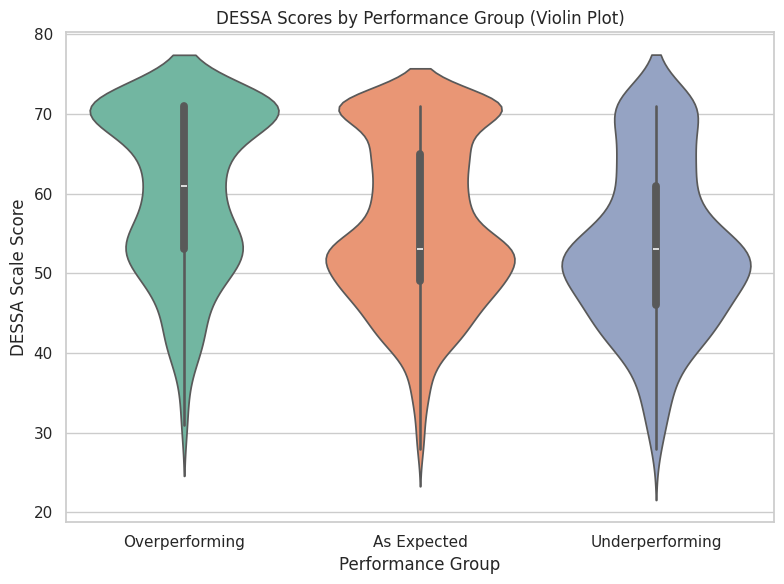

In [32]:
import statsmodels.api as sm
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Simple linear regression (Reading ~ CogAT Verbal)
X_simple = sm.add_constant(df_clean['CogAt_VERBAL_SAS'])
y_reading = df_clean['Reading_Scale_Score']
model = sm.OLS(y_reading, X_simple).fit()

# Step 2: Get standardized residuals
df_clean['std_resid'] = zscore(model.resid)

# Step 3: Label performance groups
def label_performance(resid):
    if resid >= 1:
        return 'Overperforming'
    elif resid <= -1:
        return 'Underperforming'
    else:
        return 'As Expected'

df_clean['Performance_Group'] = df_clean['std_resid'].apply(label_performance)

# Step 4: Compare DESSA scores across groups
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_clean, x='Performance_Group', y='DESSA_ScaleScore', hue= 'Performance_Group', palette='Set2')
plt.title('DESSA Scores by Performance Group (Violin Plot)')
plt.ylabel('DESSA Scale Score')
plt.xlabel('Performance Group')
plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run one-way ANOVA
grouped = df_clean.groupby('Performance_Group')['DESSA_ScaleScore']
anova_result = f_oneway(*[group for name, group in grouped])
print("ANOVA result:", anova_result)

# Run Tukey HSD test if ANOVA is significant
tukey = pairwise_tukeyhsd(endog=df_clean['DESSA_ScaleScore'],
                          groups=df_clean['Performance_Group'],
                          alpha=0.05)
print("\nTukey HSD results:\n", tukey)


ANOVA result: F_onewayResult(statistic=np.float64(41.23256614479977), pvalue=np.float64(2.5153307065153238e-18))

Tukey HSD results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1          group2     meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------
   As Expected  Overperforming   4.1952   0.0  2.7479  5.6426   True
   As Expected Underperforming   -2.974   0.0 -4.4321  -1.516   True
Overperforming Underperforming  -7.1693   0.0 -9.0417 -5.2968   True
--------------------------------------------------------------------


<ipython-input-39-9c6689cf8398>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Math_Performance_Group', y='DESSA_ScaleScore', palette='Pastel1')


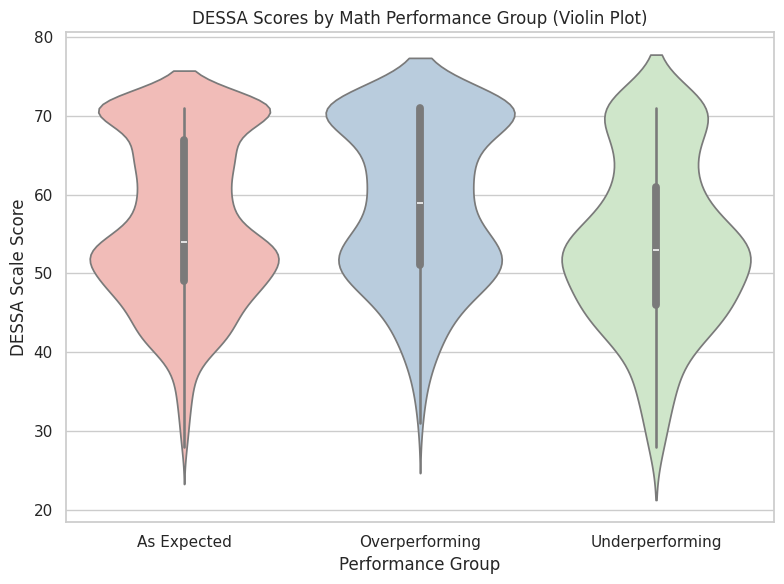

In [39]:
# Step 1: Linear regression (Math ~ CogAT Quantitative)
X_math_simple = sm.add_constant(df_clean['CogAt_QUANTITATIVE_SAS'])
y_math = df_clean['Math_Scale_Score']
math_model = sm.OLS(y_math, X_math_simple).fit()

# Step 2: Standardized residuals
df_clean['math_std_resid'] = zscore(math_model.resid)

# Step 3: Label groups
def label_math_perf(resid):
    if resid >= 1:
        return 'Overperforming'
    elif resid <= -1:
        return 'Underperforming'
    else:
        return 'As Expected'

df_clean['Math_Performance_Group'] = df_clean['math_std_resid'].apply(label_math_perf)

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_clean, x='Math_Performance_Group', y='DESSA_ScaleScore', palette='Pastel1')
plt.title('DESSA Scores by Math Performance Group (Violin Plot)')
plt.ylabel('DESSA Scale Score')
plt.xlabel('Performance Group')
plt.tight_layout()
plt.show()



In [40]:
# ANOVA for DESSA by math performance group
math_grouped = df_clean.groupby('Math_Performance_Group')['DESSA_ScaleScore']
math_anova = f_oneway(*[group for name, group in math_grouped])
print("Math ANOVA result:", math_anova)

# Tukey HSD test
math_tukey = pairwise_tukeyhsd(endog=df_clean['DESSA_ScaleScore'],
                               groups=df_clean['Math_Performance_Group'],
                               alpha=0.05)
print("\nTukey HSD results (Math):\n", math_tukey)


Math ANOVA result: F_onewayResult(statistic=np.float64(20.114465898054622), pvalue=np.float64(2.180132250365131e-09))

Tukey HSD results (Math):
          Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1          group2     meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
   As Expected  Overperforming   2.5247 0.0002  1.0462  4.0031   True
   As Expected Underperforming  -2.6682 0.0001  -4.158 -1.1784   True
Overperforming Underperforming  -5.1928    0.0 -7.1131 -3.2725   True
---------------------------------------------------------------------
